## Extract Wordcloud

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from common import connectMongo
from common import getData

In [3]:
conn = connectMongo.connect_mongo('forums','ooakForum')

In [4]:
import re 

patterns = {'Tenergy 05':"[tT]energy[-\s]?05\s?[^Ff]?[^Xx]?",
            'Baracuda':"Baracuda",
           }
regex_or = re.compile(patterns['Tenergy 05'], re.IGNORECASE)
regex_or_result = conn.find({"title":regex_or},{"title":1,"replies.clean_text":1})


## Tenergy 05

In [16]:
regex_or = re.compile(patterns['Tenergy 05'], re.IGNORECASE)
regex_or_result = conn.find({"title":regex_or},{"title":1,"replies.clean_text":1})
tmp = getData.generate_df_from_result(regex_or_result)
df_s = tmp.copy()
df_s['reply_split'] = df_s.reply.apply(getData.tokenize_sent)  # df_s.reply.apply(tokenize_sent)
df_s = df_s.explode('reply_split')
df_s = df_s.drop('reply', axis=1)
df_s = df_s.loc[df_s['reply_split'].notnull(),:]

In [17]:
df_s.reset_index(inplace=True)
searchfor = ['[tT]energy]', '[tT]05']
df1 = df_s[df_s.reply_split.str.contains('|'.join(searchfor))]

## Baracuda 

In [19]:
regex_or = re.compile(patterns['Baracuda'], re.IGNORECASE)
regex_or_result = conn.find({"title":regex_or},{"title":1,"replies.clean_text":1})
tmp = getData.generate_df_from_result(regex_or_result)
df_s = tmp.copy()
df_s['reply_split'] = df_s.reply.apply(getData.tokenize_sent)
df_s = df_s.explode('reply_split')
df_s = df_s.drop('reply', axis=1)
df_s_tmp = df_s.loc[df_s['reply_split'].notnull(),:]
df_s_tmp.reset_index(inplace=True)
searchfor = ['[bB]aracuda']
df2 = df_s_tmp[df_s_tmp.reply_split.str.contains('|'.join(searchfor))]

## Preprocess Data

In [20]:
from common import cleanData
data_col = 'reply_split'
clean_df1 = cleanData.preprocess_news(df1,data_col)
clean_df2 = cleanData.preprocess_news(df2,data_col)

In [26]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [28]:
mask = np.array(Image.open('./Img/ping_pong_paddle.jpg'))


def show_wordcloud_custom_shape(data,n_max_words=100,img_mask = []):
    if len(img_mask) == 0:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=stop, #stopwords = set(STOPWORDS)
            max_words=n_max_words,
            max_font_size=30,
            scale=3,
            random_state=1)
    else:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=stop,
            max_words=n_max_words,
            max_font_size=30,
            scale=3,
            random_state=1,mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0])
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 80) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

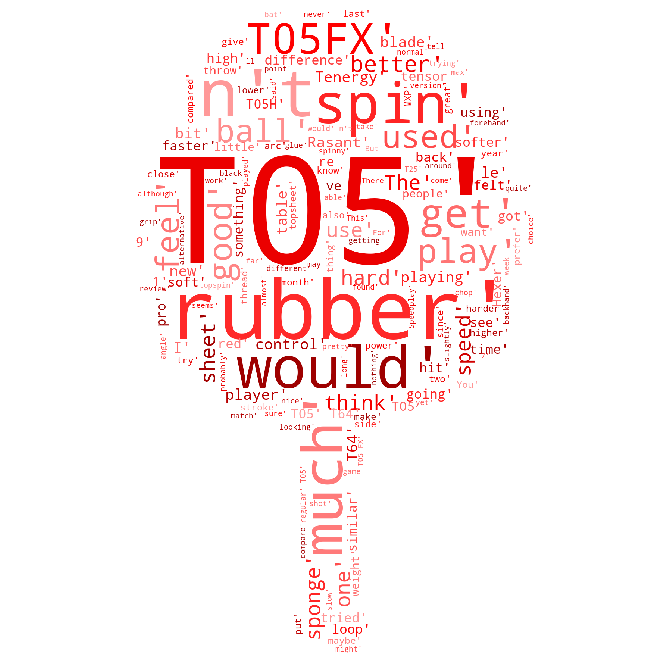

In [35]:
import matplotlib.pyplot as plt
data = clean_df1
n_max_words = 300
img_mask = mask

wordcloud = WordCloud(
            background_color='white',
            stopwords=None, #custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func)
   
wordcloud=wordcloud.generate(str(data))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

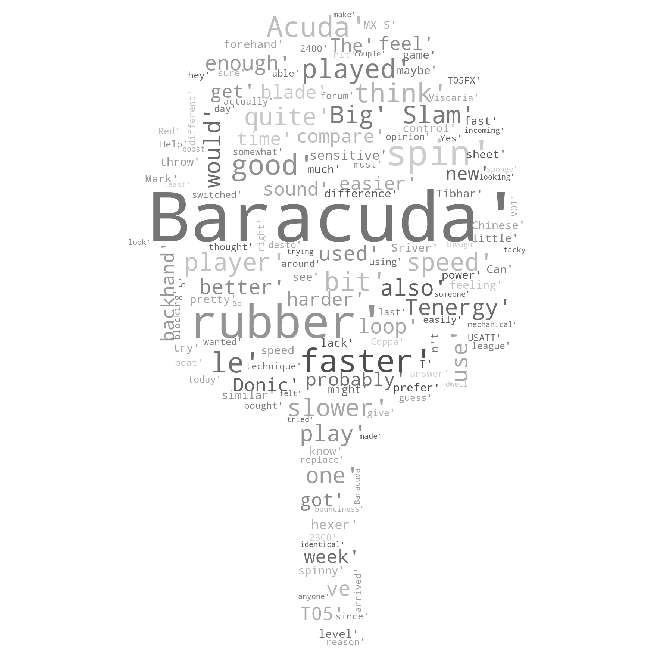

In [36]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 0 # 0 - 100
    l = random_state.randint(30, 80) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

data = clean_df2
n_max_words = 300
img_mask = mask

wordcloud = WordCloud(
            background_color='white',
            stopwords=None, #custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func)
   
wordcloud=wordcloud.generate(str(data))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()